# Read Data

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.optimize import curve_fit

#Use better looking plot settings
plt.rc('font',family='serif')

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
## Read in the advertising data
RootData = pd.read_csv("Root_Insurance_data.csv")

In [3]:
RootData

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10,2,False,0
1,Y,3,1,M,10,5,False,0
2,Y,3,2,M,10,5,False,0
3,N,3,2,S,10,4,False,0
4,unknown,2,2,S,10,2,False,0
...,...,...,...,...,...,...,...,...
9995,N,1,2,S,10,3,True,0
9996,unknown,3,2,M,10,3,False,0
9997,Y,3,1,S,10,5,False,0
9998,unknown,3,1,M,10,3,False,0


In [4]:
## See the overall statistics 
RootData.describe()

,Number of Vehicles,Number of Drivers,bid,rank,policies_sold
count,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,1.965400,1.499900,10.0,3.184100,0.078300
std,0.807755,0.500025,0.0,1.377242,0.268657
min,1.000000,1.000000,10.0,1.000000,0.000000
25%,1.000000,1.000000,10.0,2.000000,0.000000
50%,2.000000,1.000000,10.0,3.000000,0.000000
75%,3.000000,2.000000,10.0,4.000000,0.000000
max,3.000000,2.000000,10.0,5.000000,1.000000


In [5]:
## Count of "Currently Insured"
RootData['Marital Status'].value_counts()

M    5191
S    4809
Name: Marital Status, dtype: int64

In [6]:
## Count of "Number of Vehicles"
RootData['Number of Vehicles'].value_counts()

2    3464
1    3441
3    3095
Name: Number of Vehicles, dtype: int64

In [7]:
## Count of "Number of Drivers"
RootData['Number of Drivers'].value_counts()

1    5001
2    4999
Name: Number of Drivers, dtype: int64

In [8]:
## Count of click"
RootData['click'].value_counts()

False    8122
True     1878
Name: click, dtype: int64

In [9]:
## Count of "policies_sold"
RootData['policies_sold'].value_counts()

0    9217
1     783
Name: policies_sold, dtype: int64

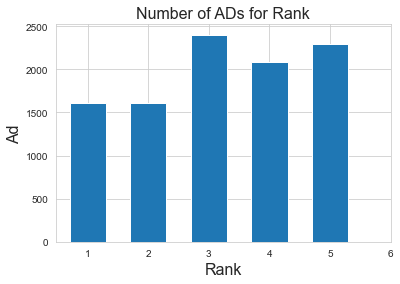

In [10]:
## View ad count distribution for rank

bins = [n for n in range(1, 7)]

plt.hist(RootData['rank'], bins, align="left", rwidth = .6)

plt.xticks(bins)

plt.xlabel("Rank", fontsize=16)
plt.ylabel("Ad", fontsize=16)

plt.title("Number of ADs for Rank", fontsize=16)

plt.show() 

Rank for $10 bids: mean = 3.1841, std = 1.377242

# Data Processing for the categorized customer groups and rank

Add the necessary data for each rank and make a new data frame "RootData2"

In [11]:
RootData2 = RootData.copy()

In [12]:
RootData2.loc[RootData2["Currently Insured"] == "unknown", 'Currently Insured'] = "U"

RootData2["rank1"] = np.where(RootData['rank'] == 1, 1, 0)
RootData2["rank2"] = np.where(RootData['rank'] == 2, 1, 0)
RootData2["rank3"] = np.where(RootData['rank'] == 3, 1, 0)
RootData2["rank4"] = np.where(RootData['rank'] == 4, 1, 0)
RootData2["rank5"] = np.where(RootData['rank'] == 5, 1, 0) 

RootData2["click_r1"] = RootData2["click"]*RootData2["rank1"]
RootData2["click_r2"] = RootData2["click"]*RootData2["rank2"]
RootData2["click_r3"] = RootData2["click"]*RootData2["rank3"]
RootData2["click_r4"] = RootData2["click"]*RootData2["rank4"]
RootData2["click_r5"] = RootData2["click"]*RootData2["rank5"]

RootData2["policies_sold_r1"] = RootData2["policies_sold"]*RootData2["rank1"]
RootData2["policies_sold_r2"] = RootData2["policies_sold"]*RootData2["rank2"]
RootData2["policies_sold_r3"] = RootData2["policies_sold"]*RootData2["rank3"]
RootData2["policies_sold_r4"] = RootData2["policies_sold"]*RootData2["rank4"]
RootData2["policies_sold_r5"] = RootData2["policies_sold"]*RootData2["rank5"]
                              
# Change integer to string
RootData2 = RootData2.astype({"Number of Vehicles": str, "Number of Drivers": str})

In [13]:
RootData2

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,rank1,rank2,...,click_r1,click_r2,click_r3,click_r4,click_r5,policies_sold_r1,policies_sold_r2,policies_sold_r3,policies_sold_r4,policies_sold_r5
0,U,2,1,M,10,2,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Y,3,1,M,10,5,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Y,3,2,M,10,5,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,3,2,S,10,4,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,U,2,2,S,10,2,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,N,1,2,S,10,3,True,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9996,U,3,2,M,10,3,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,Y,3,1,S,10,5,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,U,3,1,M,10,3,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
RootData2.describe()

,bid,rank,policies_sold,rank1,rank2,rank3,rank4,rank5,click_r1,click_r2,click_r3,click_r4,click_r5,policies_sold_r1,policies_sold_r2,policies_sold_r3,policies_sold_r4,policies_sold_r5
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.00000,10000.000000
mean,10.0,3.184100,0.078300,0.161100,0.160800,0.240100,0.208900,0.229100,0.084800,0.046200,0.035100,0.016800,0.004900,0.0358,0.020900,0.013800,0.00580,0.002000
std,0.0,1.377242,0.268657,0.367642,0.367365,0.427165,0.406543,0.420275,0.278598,0.209928,0.184042,0.128528,0.069832,0.1858,0.143057,0.116666,0.07594,0.044679
min,10.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000
25%,10.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000
50%,10.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000
75%,10.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000
max,10.0,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000


Create customer categories with "Currently Insured", "Number of Vehicles", "Number of Drivers", and "Martial Status" and analyze the data based on them. The main strategy is to selectively invest in a group of categories in the direction of minimizing the cost per customer purchasing the policy. 

In [15]:
grouped = RootData2.groupby(["Currently Insured", "Number of Vehicles", "Number of Drivers", "Marital Status"])

In [16]:
grouped.mean()
grouped.count().bid
grouped['rank'].mean()

Currently Insured  Number of Vehicles  Number of Drivers  Marital Status
N                  1                   1                  M                 3.573333
                                                          S                 3.435424
                                       2                  M                 2.454545
                                                          S                 2.441696
                   2                   1                  M                 4.391635
                                                          S                 4.286765
                                       2                  M                 3.493243
                                                          S                 3.632911
                   3                   1                  M                 4.305660
                                                          S                 4.255245
                                       2                  M                 4

In [17]:
## Make a new dataframe df for categorized clicks and policies_sold

currently_insureds = []
num_vehicles = []
num_drivers = []
martial_statuss = []
ads = []
ranks_means = []
ranks_stds = []
clicks = []
policies_solds = []
clicks_per_ads = []
policies_solds_per_ads = []
policies_solds_per_clicks = []
num_r1s = []
num_r2s = []
num_r3s = []
num_r4s = []
num_r5s = []
click_r1s = []
click_r2s = []
click_r3s = []
click_r4s = []
click_r5s = []
policies_sold_r1s = []
policies_sold_r2s = []
policies_sold_r3s = []
policies_sold_r4s = []
policies_sold_r5s = []
clicks_per_ads_r1s = []
clicks_per_ads_r2s = []
clicks_per_ads_r3s = []
clicks_per_ads_r4s = []
clicks_per_ads_r5s = []
policies_solds_per_ads_r1s = []
policies_solds_per_ads_r2s = []
policies_solds_per_ads_r3s = []
policies_solds_per_ads_r4s = []
policies_solds_per_ads_r5s = []
policies_solds_per_clicks_r1s = []
policies_solds_per_clicks_r2s = []
policies_solds_per_clicks_r3s = []
policies_solds_per_clicks_r4s = []
policies_solds_per_clicks_r5s = []

for name, group in grouped:
    currently_insureds.append(name[0])
    num_vehicles.append(name[1])
    num_drivers.append(name[2])
    martial_statuss.append(name[3])
    ads.append(group.count().bid)
    ranks_means.append(group['rank'].mean())
    ranks_stds.append(group['rank'].std())
    clicks.append(group['click'].sum())
    policies_solds.append(group['policies_sold'].sum())
    clicks_per_ads.append(group['click'].sum()/group.count().bid)
    policies_solds_per_ads.append(group['policies_sold'].sum()/group.count().bid)
    policies_solds_per_clicks.append(group['policies_sold'].sum()/group['click'].sum())
    num_r1s.append(group['rank1'].sum())
    num_r2s.append(group['rank2'].sum())
    num_r3s.append(group['rank3'].sum())
    num_r4s.append(group['rank4'].sum())
    num_r5s.append(group['rank5'].sum())
    click_r1s.append(group['click_r1'].sum())
    click_r2s.append(group['click_r2'].sum())
    click_r3s.append(group['click_r3'].sum())
    click_r4s.append(group['click_r4'].sum())
    click_r5s.append(group['click_r5'].sum())
    policies_sold_r1s.append(group['policies_sold_r1'].sum())
    policies_sold_r2s.append(group['policies_sold_r2'].sum())
    policies_sold_r3s.append(group['policies_sold_r3'].sum())
    policies_sold_r4s.append(group['policies_sold_r4'].sum())
    policies_sold_r5s.append(group['policies_sold_r5'].sum())
    clicks_per_ads_r1s.append(group['click_r1'].sum()/group['rank1'].sum())
    clicks_per_ads_r2s.append(group['click_r2'].sum()/group['rank2'].sum())
    clicks_per_ads_r3s.append(group['click_r3'].sum()/group['rank3'].sum())
    clicks_per_ads_r4s.append(group['click_r4'].sum()/group['rank4'].sum())
    clicks_per_ads_r5s.append(group['click_r5'].sum()/group['rank5'].sum())
    policies_solds_per_ads_r1s.append(group['policies_sold_r1'].sum()/group['rank1'].sum())
    policies_solds_per_ads_r2s.append(group['policies_sold_r2'].sum()/group['rank2'].sum())
    policies_solds_per_ads_r3s.append(group['policies_sold_r3'].sum()/group['rank3'].sum())
    policies_solds_per_ads_r4s.append(group['policies_sold_r4'].sum()/group['rank4'].sum())
    policies_solds_per_ads_r5s.append(group['policies_sold_r5'].sum()/group['rank5'].sum())
    policies_solds_per_clicks_r1s.append(group['policies_sold_r1'].sum()/group['click_r1'].sum())
    policies_solds_per_clicks_r2s.append(group['policies_sold_r2'].sum()/group['click_r2'].sum())
    policies_solds_per_clicks_r3s.append(group['policies_sold_r3'].sum()/group['click_r3'].sum())
    policies_solds_per_clicks_r4s.append(group['policies_sold_r4'].sum()/group['click_r4'].sum())
    policies_solds_per_clicks_r5s.append(group['policies_sold_r5'].sum()/group['click_r5'].sum())
    

<ipython-input-17-aa0593bd21b5>:74: RuntimeWarning: invalid value encountered in longlong_scalars
  clicks_per_ads_r1s.append(group['click_r1'].sum()/group['rank1'].sum())
<ipython-input-17-aa0593bd21b5>:79: RuntimeWarning: invalid value encountered in longlong_scalars
  policies_solds_per_ads_r1s.append(group['policies_sold_r1'].sum()/group['rank1'].sum())
<ipython-input-17-aa0593bd21b5>:84: RuntimeWarning: invalid value encountered in longlong_scalars
  policies_solds_per_clicks_r1s.append(group['policies_sold_r1'].sum()/group['click_r1'].sum())
<ipython-input-17-aa0593bd21b5>:88: RuntimeWarning: invalid value encountered in longlong_scalars
  policies_solds_per_clicks_r5s.append(group['policies_sold_r5'].sum()/group['click_r5'].sum())
<ipython-input-17-aa0593bd21b5>:78: RuntimeWarning: invalid value encountered in longlong_scalars
  clicks_per_ads_r5s.append(group['click_r5'].sum()/group['rank5'].sum())
<ipython-input-17-aa0593bd21b5>:83: RuntimeWarning: invalid value encountered in

In [18]:
data = {'currently_insured': currently_insureds, 
        'num_vehicle': num_vehicles,
        'num_driver': num_drivers,
        'martial_status': martial_statuss,
        'ad': ads,
        'ranks_mean': ranks_means,
        'ranks_std': ranks_stds,
        'click': clicks,
        'policies_sold': policies_solds,
        'clicks_per_ad': clicks_per_ads,
        'policies_solds_per_ad': policies_solds_per_ads,
        'policies_solds_per_click':  policies_solds_per_clicks,
        'num_r1': num_r1s,
        'num_r1': num_r1s,
        'num_r1': num_r1s,
        'num_r1': num_r1s,
        'num_r1': num_r1s,
        'click_r1': click_r1s,
        'click_r2': click_r2s,
        'click_r3': click_r3s,
        'click_r4': click_r4s,
        'click_r5': click_r5s,
        'policies_sold_r1': policies_sold_r1s,
        'policies_sold_r2': policies_sold_r2s,
        'policies_sold_r3': policies_sold_r3s,
        'policies_sold_r4': policies_sold_r4s,
        'policies_sold_r5': policies_sold_r5s,
        'clicks_per_ads_r1': clicks_per_ads_r1s,
        'clicks_per_ads_r2': clicks_per_ads_r2s,
        'clicks_per_ads_r3': clicks_per_ads_r3s,
        'clicks_per_ads_r4': clicks_per_ads_r4s,
        'clicks_per_ads_r5': clicks_per_ads_r5s,
        'policies_solds_per_ads_r1': policies_solds_per_ads_r1s,
        'policies_solds_per_ads_r2': policies_solds_per_ads_r2s,
        'policies_solds_per_ads_r3': policies_solds_per_ads_r3s,
        'policies_solds_per_ads_r4': policies_solds_per_ads_r4s,
        'policies_solds_per_ads_r5': policies_solds_per_ads_r5s,
        'policies_solds_per_clicks_r1': policies_solds_per_clicks_r1s,
        'policies_solds_per_clicks_r2': policies_solds_per_clicks_r2s,
        'policies_solds_per_clicks_r3': policies_solds_per_clicks_r3s,
        'policies_solds_per_clicks_r4': policies_solds_per_clicks_r4s,
        'policies_solds_per_clicks_r5': policies_solds_per_clicks_r5s}
        

In [19]:
df = pd.DataFrame(data)

In [20]:
df

,currently_insured,num_vehicle,num_driver,martial_status,ad,ranks_mean,ranks_std,click,policies_sold,clicks_per_ad,...,policies_solds_per_ads_r1,policies_solds_per_ads_r2,policies_solds_per_ads_r3,policies_solds_per_ads_r4,policies_solds_per_ads_r5,policies_solds_per_clicks_r1,policies_solds_per_clicks_r2,policies_solds_per_clicks_r3,policies_solds_per_clicks_r4,policies_solds_per_clicks_r5
0,N,1,1,M,300,3.573333,1.017221,25,14,0.083333,...,NaN,0.113208,0.057471,0.021053,0.015385,NaN,0.600000,0.500000,0.666667,0.500000
1,N,1,1,S,271,3.435424,1.023103,43,25,0.158672,...,NaN,0.237288,0.095238,0.037975,0.000000,NaN,0.636364,0.533333,0.500000,NaN
2,N,1,2,M,275,2.454545,0.996677,74,31,0.269091,...,0.189655,0.128205,0.052632,0.113636,NaN,0.392857,0.384615,0.357143,0.833333,NaN
3,N,1,2,S,283,2.441696,1.037913,79,32,0.279152,...,0.187500,0.180723,0.036145,0.037736,NaN,0.333333,0.625000,0.200000,0.500000,NaN
4,N,2,1,M,263,4.391635,0.753267,15,6,0.057034,...,NaN,NaN,0.093023,0.013514,0.006849,NaN,NaN,0.571429,0.250000,0.250000
5,N,2,1,S,272,4.286765,0.814156,16,5,0.058824,...,NaN,NaN,0.064516,0.000000,0.007143,NaN,NaN,0.363636,0.000000,1.000000
6,N,2,2,M,296,3.493243,0.984604,33,15,0.111486,...,NaN,0.150943,0.051546,0.010753,0.018868,NaN,0.470588,0.500000,0.200000,1.000000
7,N,2,2,S,316,3.632911,1.003830,32,15,0.101266,...,NaN,0.083333,0.063830,0.040000,0.013514,NaN,0.444444,0.545455,0.363636,1.000000
8,N,3,1,M,265,4.305660,0.774209,15,9,0.056604,...,NaN,NaN,0.078431,0.048780,0.007576,NaN,NaN,0.571429,0.666667,0.500000
9,N,3,1,S,286,4.255245,0.782186,22,8,0.076923,...,NaN,NaN,0.050000,0.043011,0.007519,NaN,NaN,0.333333,0.444444,0.250000


In [21]:
# Create a category name column

df_row_len = df.shape[0]

category_names = []

for i in range(0,df_row_len):
    category_names.append(df.currently_insured[i] + df.num_vehicle[i] + df.num_driver[i] + df.martial_status[i])
    

In [22]:
category_names

['N11M',
 'N11S',
 'N12M',
 'N12S',
 'N21M',
 'N21S',
 'N22M',
 'N22S',
 'N31M',
 'N31S',
 'N32M',
 'N32S',
 'U11M',
 'U11S',
 'U12M',
 'U12S',
 'U21M',
 'U21S',
 'U22M',
 'U22S',
 'U31M',
 'U31S',
 'U32M',
 'Y11M',
 'Y11S',
 'Y12M',
 'Y12S',
 'Y21M',
 'Y21S',
 'Y22M',
 'Y22S',
 'Y31M',
 'Y31S',
 'Y32M',
 'Y32S']

In [23]:
## Add "category name" to dataframe
df['category_name'] = category_names

# Modeling for clicks_per_ad vs. rank and policies_solds_per_clicks vs. rank

Create the following models for each category <br>
1) clicks_per_ad vs. rank with exponential function (According to Patrick's data analysis, the exponential function best describes this data.) <br>
$$
y = A \exp^{-x/\tau}
$$
2) policies_solds_per_clicks vs. rank (linear regression)
$$
y = a + bx
$$

In [24]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from numpy import nan

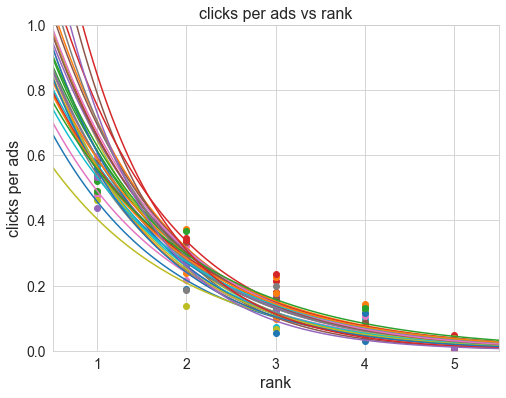

In [25]:
# Modeling for clicks per ads distribution vs. rank
# with the exponential function

df_row_len = df.shape[0]
df_col_len = df.shape[1]

model1_amps = []
model1_taus = []
model1_p_values_amps = []
model1_p_values_taus = []

Xpred = np.linspace(0.5,5.5,100)

clicks_per_ads_means = [df['clicks_per_ads_r1'].mean(), df['clicks_per_ads_r2'].mean(), df['clicks_per_ads_r3'].mean(), df['clicks_per_ads_r4'].mean(), df['clicks_per_ads_r5'].mean()]
#print(clicks_per_ads_means)
plt.figure(figsize=(8,6))

for i in range(0,df_row_len):
    X = [1, 2, 3, 4, 5]
    y1 = df.iloc[i,23:28].to_list()
    
    #print(X)
    #print(y1)
    indices = np.logical_or(np.isnan(y1), np.abs(y1) < 1e-300) 
    #print(indices)

    for j in range(len(indices)):
        if indices[j]:
            y1[j] = clicks_per_ads_means[j]
        else:
            pass
    
    logy1 = np.log(y1)
    #print(logy1)
    
    reg = sm.OLS(logy1,sm.add_constant(np.array(X).reshape(-1, 1)),).fit()
    #print(reg.summary())
    model1_amps.append(np.exp(reg.params[0]))
    model1_taus.append(-1/reg.params[1])
    model1_p_values_amps.append(reg.pvalues[0])
    model1_p_values_taus.append(reg.pvalues[1])
    #print(reg.pvalues)
    
    ypred = np.exp(reg.params[0])*np.exp(Xpred*reg.params[1])
    
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(X, y1)
    ax.plot(Xpred, ypred)
    ax.set_xlabel("rank", fontsize=16)
    ax.set_ylabel("clicks per ads", fontsize=16)
    ax.set_title("clicks per ads vs rank", fontsize=16)
    ax.set_xlim([0.5,5.5])
    ax.set_ylim([0,1])
    
#plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

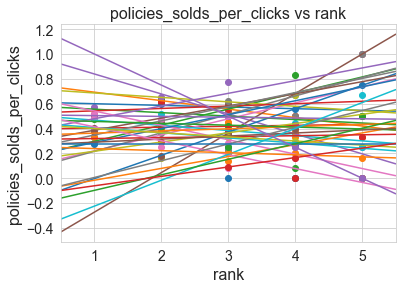

In [26]:
# Modeling for policies_solds_per_clicks vs. rank
# with the linear function

df_row_len = df.shape[0]
df_col_len = df.shape[1]

model2_consts = []
model2_slopes = []

Xpred2 = np.linspace(0.5,5.5,100)

for i in range(0,df_row_len):
    X = [1, 2, 3, 4, 5]
    y2 = df.iloc[i,33:38].to_list()
    
    #print(X)
    #print(y2)
    indices = np.logical_not(np.logical_or(np.isnan(y2), np.abs(y2) < 1e-300)) 
    #print(indices)
    
    X_new = []
    y2_new = []
    for i in range(len(indices)):
        #print(i)
        if indices[i]:
            X_new.append(X[i])
            y2_new.append(y2[i])
        else:
            pass
    
    reg = LinearRegression(copy_X = True)
    
    reg.fit(np.array(X_new).reshape(-1, 1),y2_new)

    model2_consts.append(reg.intercept_)
    model2_slopes.append(reg.coef_[0])
    
    ypred2 = reg.intercept_ + reg.coef_[0]*Xpred2
    
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(X, y2)
    ax.plot(Xpred2, ypred2)
    ax.set_xlabel("rank", fontsize=16)
    ax.set_ylabel("policies_solds_per_clicks", fontsize=16)
    ax.set_title("policies_solds_per_clicks vs rank", fontsize=16)
    ax.set_xlim([0.5,5.5])
    #ax.set_ylim([0,1])
    
 #   plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Linear regression doesn't seem to be a good way to do it because there is no specific trend towrads rank and some categories have negative policies_solds_per_clicks that are practically impossible. So, decide to just take the mean value as Patrick did.

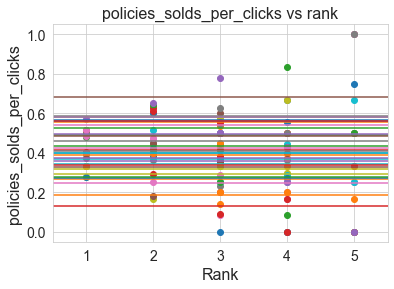

In [27]:
# See the policies_solds_per_clicks for rank

df_row_len = df.shape[0]
df_col_len = df.shape[1]

model3_means = []

Xpred3 = np.linspace(0.5,5.5,100)

for i in range(0,df_row_len):
    X = [1, 2, 3, 4, 5]
    y3 = df.iloc[i,33:38].to_list()
    
    #print(X)
    #print(y3)
    indices = np.logical_not(np.logical_or(np.isnan(y3), np.abs(y3) < 1e-300)) 
    #print(indices)
    
    X_new = []
    y3_new = []
    for i in range(len(indices)):
        #print(i)
        if indices[i]:
            X_new.append(X[i])
            y3_new.append(y3[i])
        else:
            pass

    model3_means.append(sum(y3_new)/len(y3_new))
    
    ypred3 = [sum(y3_new)/len(y3_new)]*100
    
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(X, y3)
    ax.plot(Xpred3, ypred3)
    ax.set_xlabel("Rank", fontsize=16)
    ax.set_ylabel("policies_solds_per_clicks", fontsize=16)
    ax.set_title("policies_solds_per_clicks vs rank", fontsize=16)
    ax.set_xlim([0.5,5.5])
    #ax.set_ylim([0,1])
    
 #   plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [28]:
## Add model parameters for each category to the dataframe

df['model1_amp'] = model1_amps
df['model1_tau'] = model1_taus
df['model1_p_values_amp'] = model1_p_values_amps
df['model1_p_values_tau'] = model1_p_values_taus

# the mean value of policies_solds_per_click for rank is already in the dataframe.
#df['model3_mean'] = model3_means

In [29]:
df

,currently_insured,num_vehicle,num_driver,martial_status,ad,ranks_mean,ranks_std,click,policies_sold,clicks_per_ad,...,policies_solds_per_clicks_r1,policies_solds_per_clicks_r2,policies_solds_per_clicks_r3,policies_solds_per_clicks_r4,policies_solds_per_clicks_r5,category_name,model1_amp,model1_tau,model1_p_values_amp,model1_p_values_tau
0,N,1,1,M,300,3.573333,1.017221,25,14,0.083333,...,NaN,0.600000,0.500000,0.666667,0.500000,N11M,0.966553,1.335786,0.927669,0.005529
1,N,1,1,S,271,3.435424,1.023103,43,25,0.158672,...,NaN,0.636364,0.533333,0.500000,NaN,N11S,1.570415,1.248149,0.248902,0.003539
2,N,1,2,M,275,2.454545,0.996677,74,31,0.269091,...,0.392857,0.384615,0.357143,0.833333,NaN,N12M,1.247670,1.404136,0.696385,0.019458
3,N,1,2,S,283,2.441696,1.037913,79,32,0.279152,...,0.333333,0.625000,0.200000,0.500000,NaN,N12S,1.451289,1.269525,0.280577,0.002707
4,N,2,1,M,263,4.391635,0.753267,15,6,0.057034,...,NaN,NaN,0.571429,0.250000,0.250000,N21M,1.266661,1.316289,0.259142,0.000669
5,N,2,1,S,272,4.286765,0.814156,16,5,0.058824,...,NaN,NaN,0.363636,0.000000,1.000000,N21S,2.194096,0.977497,0.291922,0.011783
6,N,2,2,M,296,3.493243,0.984604,33,15,0.111486,...,NaN,0.470588,0.500000,0.200000,1.000000,N22M,1.421830,1.181634,0.144907,0.000569
7,N,2,2,S,316,3.632911,1.003830,32,15,0.101266,...,NaN,0.444444,0.545455,0.363636,1.000000,N22S,1.186208,1.269419,0.792200,0.021707
8,N,3,1,M,265,4.305660,0.774209,15,9,0.056604,...,NaN,NaN,0.571429,0.666667,0.500000,N31M,1.505184,1.179386,0.321356,0.003865
9,N,3,1,S,286,4.255245,0.782186,22,8,0.076923,...,NaN,NaN,0.333333,0.444444,0.250000,N31S,1.132555,1.464514,0.602985,0.001824


# Modeling for Competitors' Bid using Poisson Distribution

We assume that competitors' bid form a poisson distribution. There are only two free characterization parameters: the bid mean and the bid_unit which determines the variation in the Poisson distribution. So we can image a situation where the competitors submit randomly with a discrete bid_unit(ex. \\$1.00) about the mean value (ex. \\$10.00). <br><br>
Possion Distribution: <br>
$$
f(x;\mu) = \frac{\mu^{x} e^{-\mu}}{x !}
$$
where $x$ is the bid in unit of bid_unit, and $\mu$ is the expectation value and the variation of the poisson distiribution.

In [30]:
from scipy.stats import poisson
from scipy import interpolate

In [31]:
# Check the poisson function in the package

mu = 10
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print("mean =", mean)
print("var =", var)
print("skew =", skew)
print("kurt =", kurt)

mean = 10.0
var = 10.0
skew = 0.31622776601683794
kurt = 0.1


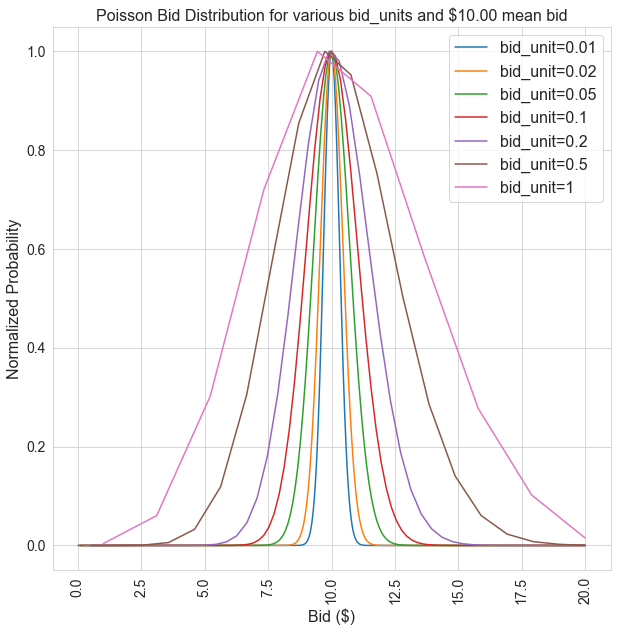

In [32]:
# see the poisson distribution for each bid_unit with mean value $10.00

bid_unit_ex = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
bid_mean_ex = 10
bid_length_ex = [int(bid_mean_ex / x) for x in bid_unit_ex]
mu = [int(bid_mean_ex / x) for x in bid_unit_ex]
#print(bid_length_ex)
#print(mu)

plt.figure(figsize = (10,10))
for i in range(len(bid_unit_ex)):
 
    X = np.linspace(bid_unit_ex[i], bid_mean_ex*2, bid_length_ex[i])
    X_int = [int(x / bid_unit_ex[i]) for x in X]
    #print("X shape", X.shape)
    #print(X_int)
    y = poisson.pmf(X_int, mu[i])
    y_max = max(y)
    y_norm = y/y_max
    #print("y shape", y.shape)
    #print(y)
    
    ax = plt.gca()
    ax.plot(X, y_norm)
    ax.set_xlabel("Bid ($)", fontsize=16)
    ax.set_ylabel("Normalized Probability", fontsize=16)
    ax.set_title("Poisson Bid Distribution for various bid_units and $10.00 mean bid", fontsize=16)
    #ax.set_xlim([0.5,5.5])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper right", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()


Estimate the mean value of bid for the poisson distribution for each category from the mean rank for the \\$10.00 bid in the data. <br>
to do this, we define several functions that give the relationship between the bid and its corresponding distribution percentage of the poisson distribution. <br>
Here we use conversion between rank and distribution percentage as follow: <br><br>
$$
(\textrm{distribution percentage}) = 110 - 20*(\textrm{rank})
$$


In [33]:
# Find mean value from the rank with $10.00 bid through Poisson distribution
bid_upper_limit = 2*10    # in dollaors

def find_mean_poisson(bid, rank, bid_unit):
    mu = np.linspace(1, bid_upper_limit, 10000)
    bid_norm = bid/bid_unit
    mu_norm = mu/bid_unit
    prob = poisson.cdf(bid_norm, mu_norm) 
    f = interpolate.interp1d(prob, mu_norm)
    prob_rank = (110 - rank*20)/100
    bid_mean = f(prob_rank)*bid_unit
    return np.round(bid_mean,2)

def inv_poisson(prob, mu, bid_unit):
    bid_ref = np.linspace(1, bid_upper_limit, 10000)
    bid_norm = bid_ref/bid_unit
    mu_norm = mu/bid_unit
    prob_ref = poisson.cdf(bid_norm, mu_norm) 
    f = interpolate.interp1d(prob_ref, bid_norm)
    #print(f)
    bid = f(prob)*bid_unit
    return np.round(bid,2)

def cdf_poisson(bid, mu, bid_unit):
    bid_norm = bid/bid_unit
    mu_norm = mu/bid_unit
    prob = poisson.cdf(bid_norm, mu_norm) 
    rank = 5.5 - 5*prob
    return prob, rank

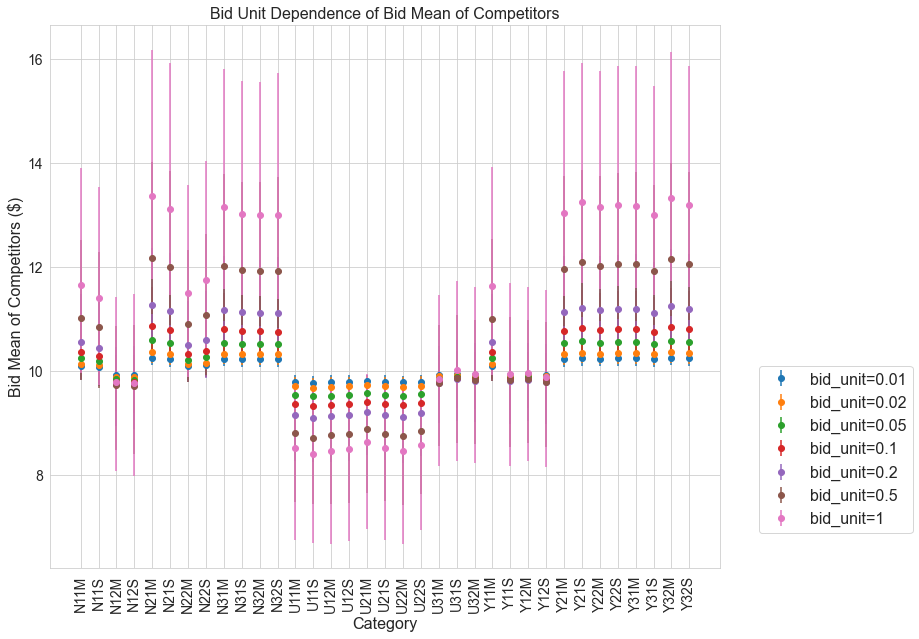

In [34]:
# See the mean values of the poisson distribution for the categories.

df_row_len = df.shape[0]

bid_unit = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
#bid_unit = [0.01, 0.02, 0.05, 0.1]
#bid_unit = [0.01]
bid = 10

X_category_name = df.category_name.tolist() 

mu_poissons = np.zeros((df_row_len, len(bid_unit)))
mu_errormax_poissons = np.zeros((df_row_len, len(bid_unit)))
mu_errormin_poissons = np.zeros((df_row_len, len(bid_unit)))

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):
 
    X_rank = df.ranks_mean
    X_rank_error = df.ranks_std
    #print(X_rank_error)
    y = find_mean_poisson(bid, X_rank, bid_unit[i])
    y_errormax = find_mean_poisson(bid, X_rank - X_rank_error, bid_unit[i]) - y
    y_errormin = y - find_mean_poisson(bid, X_rank + X_rank_error, bid_unit[i])
    mu_poissons[:,i] = y
    mu_errormax_poissons[:,i] = y_errormax
    mu_errormin_poissons[:,i] = y_errormin
    #print(y_errormax)
    #print()
    #print(y_errormin)
    y_error = [y_errormin, y_errormax]
    
    ax = plt.gca()
    ax.errorbar(X_category_name, y, yerr=y_error, fmt='o')
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Bid Mean of Competitors ($)", fontsize=16)
    ax.set_title("Bid Unit Dependence of Bid Mean of Competitors", fontsize=16)
    #ax.set_xlim([0.5,5.5])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="lower right", fontsize=16, bbox_to_anchor=(1.3, 0.05))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# Calculate the bid corresponding to the bottom 1 % of the poisson distribution for the categories
# These values are used to determine the minimum bid rquired to increase the rank from 5.5 given by the minimum bid. 

df_row_len = df.shape[0]

bid_unit = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
#bid_unit = [0.01, 0.02, 0.05, 0.1]
#bid_unit = [0.01]
bid = 10
prob_min = 0.01

bid_min_poissons = np.zeros((df_row_len, len(bid_unit)))

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist();

figure = plt.figure(figsize=(12,10))


for i in range(len(bid_unit)):
    
    for j in range(df_row_len):
        y[j] = inv_poisson(prob_min, mu_poissons[j,i], bid_unit[i])
    bid_min_poissons[:,i] = y
    ax = plt.gca()
    ax.errorbar(X_category_name, y, yerr=y_error, fmt='o')
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Minimium Bid  required to increase the Rank ($)", fontsize=16)
    ax.set_title("Minimum Bid required to increase the Rank", fontsize=16)
    #ax.set_xlim([0.5,5.5])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="lower right", fontsize=16, bbox_to_anchor=(1.3, 0.05))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# Find the offer bids minimizing the cost per customers achieved 

Calculate the total sold policies for the proposing bid. <br>
Here we use bid_flat as a single free parameter. <br> 
Then, later we convert it to the acutal bid for each category, reflecting the weight of policies_sold_per_click. <br>
Note the our goal is to minimize the cost per achieved customers. 

## 1) Calculation for the 400 policies sold

0
1
2
3
4
5
6


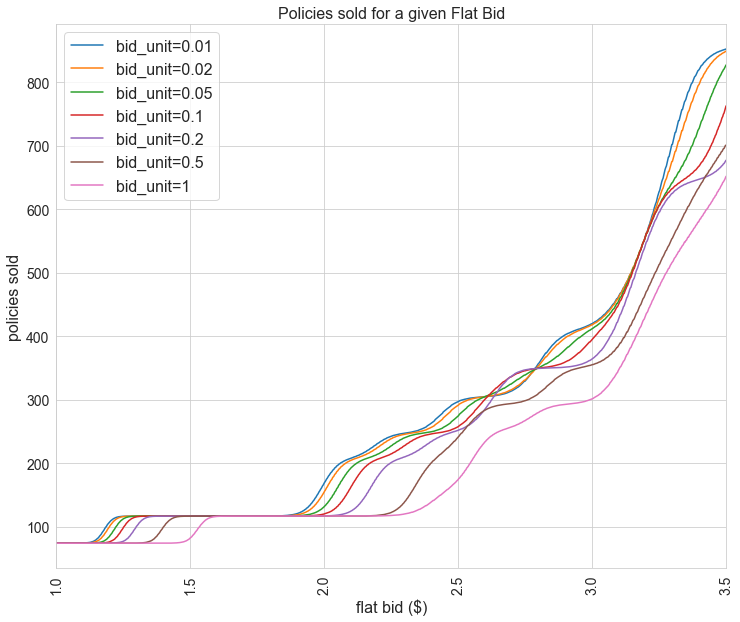

In [94]:
# Calculate the total sold policies for the applied bid

df_row_len = df.shape[0]

bid_unit = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
bid_max = 3.5
bid_min = 1
bid_unit_min = 0.01

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist();

figure = plt.figure(figsize=(12,10))

model1_amps = df["model1_amp"].tolist()
model1_taus = df["model1_tau"].tolist()
bid_ad_nums = df["ad"].tolist()
policies_solds_per_clicks = df["policies_solds_per_click"].tolist()

bid_len = 1000
bid_flat = np.linspace(bid_min, bid_max, bid_len)
#print(bid_flat)
bid_applied = np.zeros((df_row_len,bid_len));
#print(bid_applied)
for k in range(bid_len):
    for j in range(df_row_len):
        bid_applied[j,k] = bid_flat[k]/policies_solds_per_clicks[j]
#print(bid_applied)

bid_applied_ranks = np.zeros([len(bid_unit), df_row_len, bid_len])
bid_applied_click_per_ads = np.zeros([len(bid_unit), df_row_len, bid_len])
bid_applied_click_nums = np.zeros([len(bid_unit), df_row_len, bid_len])
bid_applied_policies_solds_nums = np.zeros([len(bid_unit), df_row_len, bid_len])

bid_applied_policies_solds_sums = np.zeros([len(bid_unit), bid_len])

y = np.zeros((bid_len,1)).tolist();

for i in range(len(bid_unit)):
    print(i)
    for k in range(bid_len):
        for j in range(df_row_len):
            if bid_applied[j,k] < bid_min_poissons[j,i]:
                bid_applied_ranks[i,j,k] = cdf_poisson(bid_unit_min, mu_poissons[j,i], bid_unit_min)[1] 
                bid_applied_click_per_ads[i,j,k] = model1_amps[j]*np.exp(-bid_applied_ranks[i,j,k]/model1_taus[j])
                bid_applied_click_nums[i,j,k] = bid_applied_click_per_ads[i,j,k]*bid_ad_nums[j] 
                bid_applied_policies_solds_nums[i,j,k] = bid_applied_click_nums[i,j,k]*policies_solds_per_clicks[j]
            else:
                bid_applied_ranks[i,j,k] = cdf_poisson(bid_applied[j,k], mu_poissons[j,i], bid_unit_min)[1] 
                bid_applied_click_per_ads[i,j,k] = model1_amps[j]*np.exp(-bid_applied_ranks[i,j,k]/model1_taus[j])
                bid_applied_click_nums[i,j,k] = bid_applied_click_per_ads[i,j,k]*bid_ad_nums[j] 
                bid_applied_policies_solds_nums[i,j,k] = bid_applied_click_nums[i,j,k]*policies_solds_per_clicks[j] 
    y = np.sum(bid_applied_policies_solds_nums[i,:,:], axis = 0)  
    #print(y)
    bid_applied_policies_solds_sums[i,:] = y

    ax = plt.gca()
    ax.plot(bid_flat, y)
    ax.set_xlabel("flat bid ($)", fontsize=16)
    ax.set_ylabel("policies sold", fontsize=16)
    ax.set_title("Policies sold for a given Flat Bid", fontsize=16)
    ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

Here we find the proposing bids corresponding to the 400 policies sold first.

In [96]:
# Find the flat_bid corresponding to the 400 policies for various bid_unit 

policies_sold_min = 400
k_index_opts = np.zeros([len(bid_unit), 1]).astype(int).tolist()
flat_bid_opts = np.zeros([len(bid_unit), 1]).tolist()

for i in range(len(bid_unit)):
    k_index = np.argmin(np.abs(bid_applied_policies_solds_sums[i,:]-policies_sold_min), axis=0).astype(int)
    if bid_applied_policies_solds_sums[i,k_index] < policies_sold_min:
        k_index += 1
    k_index_opts[i] = k_index
    #print(flat_bid_opts[i])
    flat_bid_opts[i] = bid_flat[k_index]

#print(k_index_opts)
#print(flat_bid_opts)

In [97]:
# Calculate the proposing bid, rank, click numbers, and policies sold numbers corresponding to the 400 policies for various bid_unit 

applied_bid_opts = np.zeros((len(bid_unit),df_row_len))
rank_opts = np.zeros((len(bid_unit),df_row_len))
#click_per_ad_opts = np.zeros((len(bid_unit),df_row_len))
click_num_opts = np.zeros((len(bid_unit),df_row_len))
policies_sold_num_opts = np.zeros((len(bid_unit),df_row_len))

for i in range(len(bid_unit)):
    for j in range(df_row_len):
        #print(policies_solds_per_clicks[j])
        applied_bid_opts[i,j] = flat_bid_opts[i]/policies_solds_per_clicks[j]
        if applied_bid_opts[i,j] < bid_min_poissons[j,i]:
            applied_bid_opts[i,j] = bid_unit[i]
        rank_opts[i,j] = bid_applied_ranks[i,j,k_index_opts[i]]
        #click_per_ad_opts[i,j] = bid_applied_click_per_ads[i,j,k_index_opts[i]]
        click_num_opts[i,j] =  bid_applied_click_nums[i,j,k_index_opts[i]]
        policies_sold_num_opts[i,j] = click_num_opts[i,j]*policies_solds_per_clicks[j]
                

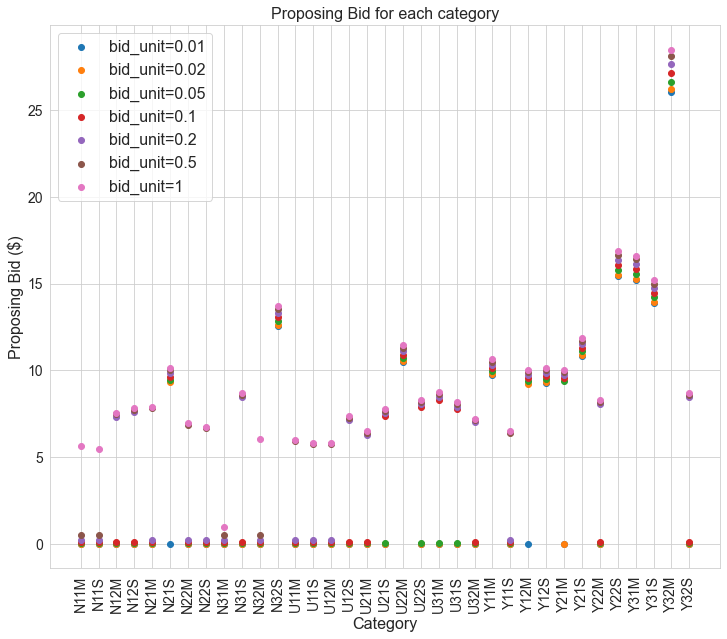

In [98]:
# plot "Proposing Bid"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = applied_bid_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Proposing Bid ($)", fontsize=16)
    ax.set_title("Proposing Bid for each category (400 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

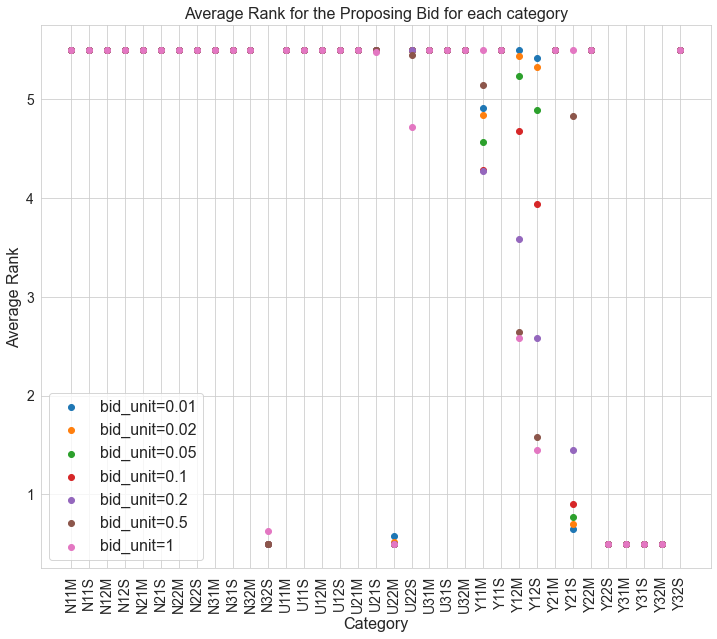

In [100]:
# plot "rank"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = rank_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Average Rank", fontsize=16)
    ax.set_title("Average Rank for the Proposing Bid for each category (400 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="lower left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

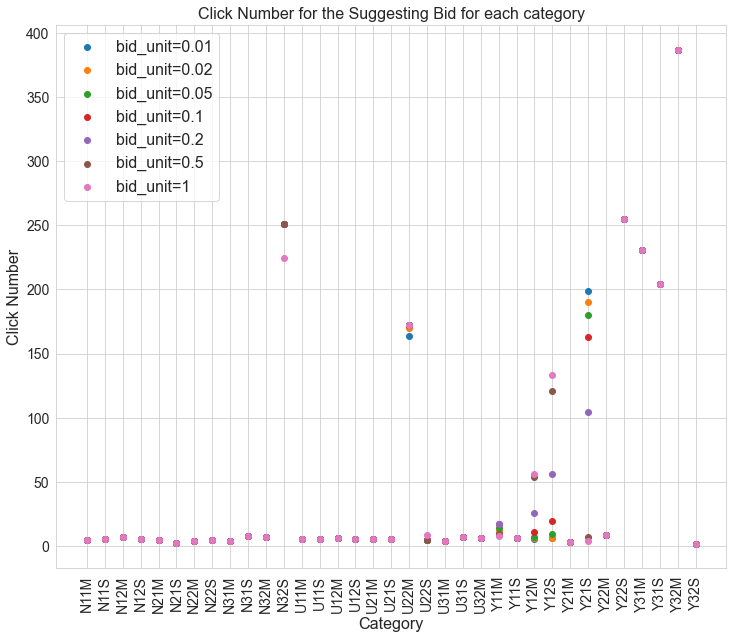

In [101]:
# plot "Click Number"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = click_num_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Click Number", fontsize=16)
    ax.set_title("Click Number for the Suggesting Bid for each category (400 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

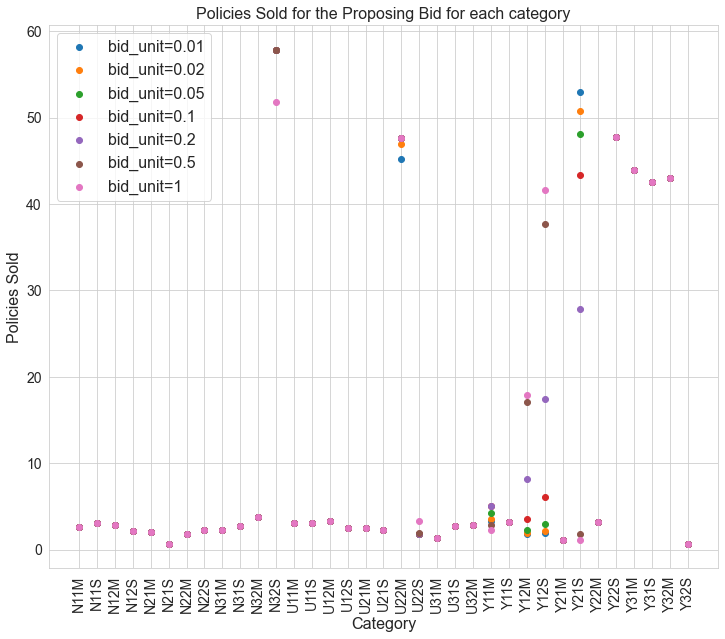

In [102]:
# plot "Policies Sold Number"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = policies_sold_num_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Policies Sold", fontsize=16)
    ax.set_title("Policies Sold for the Proposing Bid for each category (400 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

## 2) Calculation for the 1000 policies sold

Here now we find the proposing bids corresponding to the 1000 policies sold.

0
1
2
3
4
5
6


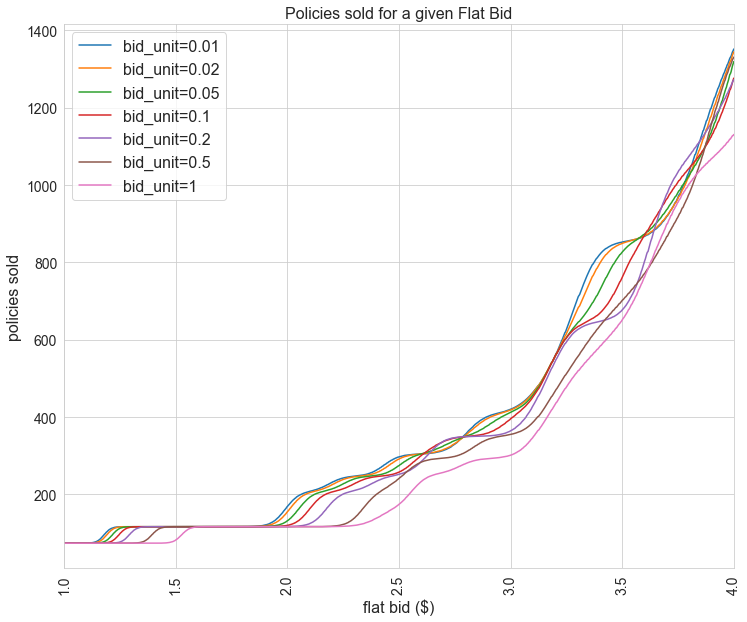

In [104]:
# Calculate the total sold policies for the applied bid in the wider range of bid_flat

df_row_len = df.shape[0]

bid_unit = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
bid_max = 4
bid_min = 1
bid_unit_min = 0.01

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist();

figure = plt.figure(figsize=(12,10))

model1_amps = df["model1_amp"].tolist()
model1_taus = df["model1_tau"].tolist()
bid_ad_nums = df["ad"].tolist()
policies_solds_per_clicks = df["policies_solds_per_click"].tolist()

bid_len = 1000
bid_flat = np.linspace(bid_min, bid_max, bid_len)
#print(bid_flat)
bid_applied = np.zeros((df_row_len,bid_len));
#print(bid_applied)
for k in range(bid_len):
    for j in range(df_row_len):
        bid_applied[j,k] = bid_flat[k]/policies_solds_per_clicks[j]
#print(bid_applied)

bid_applied_ranks = np.zeros([len(bid_unit), df_row_len, bid_len])
bid_applied_click_per_ads = np.zeros([len(bid_unit), df_row_len, bid_len])
bid_applied_click_nums = np.zeros([len(bid_unit), df_row_len, bid_len])
bid_applied_policies_solds_nums = np.zeros([len(bid_unit), df_row_len, bid_len])

bid_applied_policies_solds_sums = np.zeros([len(bid_unit), bid_len])

y = np.zeros((bid_len,1)).tolist();

for i in range(len(bid_unit)):
    print(i)
    for k in range(bid_len):
        for j in range(df_row_len):
            if bid_applied[j,k] < bid_min_poissons[j,i]:
                bid_applied_ranks[i,j,k] = cdf_poisson(bid_unit_min, mu_poissons[j,i], bid_unit_min)[1] 
                bid_applied_click_per_ads[i,j,k] = model1_amps[j]*np.exp(-bid_applied_ranks[i,j,k]/model1_taus[j])
                bid_applied_click_nums[i,j,k] = bid_applied_click_per_ads[i,j,k]*bid_ad_nums[j] 
                bid_applied_policies_solds_nums[i,j,k] = bid_applied_click_nums[i,j,k]*policies_solds_per_clicks[j]
            else:
                bid_applied_ranks[i,j,k] = cdf_poisson(bid_applied[j,k], mu_poissons[j,i], bid_unit_min)[1] 
                bid_applied_click_per_ads[i,j,k] = model1_amps[j]*np.exp(-bid_applied_ranks[i,j,k]/model1_taus[j])
                bid_applied_click_nums[i,j,k] = bid_applied_click_per_ads[i,j,k]*bid_ad_nums[j] 
                bid_applied_policies_solds_nums[i,j,k] = bid_applied_click_nums[i,j,k]*policies_solds_per_clicks[j] 
    y = np.sum(bid_applied_policies_solds_nums[i,:,:], axis = 0)  
    #print(y)
    bid_applied_policies_solds_sums[i,:] = y

    ax = plt.gca()
    ax.plot(bid_flat, y)
    ax.set_xlabel("flat bid ($)", fontsize=16)
    ax.set_ylabel("policies sold", fontsize=16)
    ax.set_title("Policies sold for a given Flat Bid", fontsize=16)
    ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [105]:
# Find the flat_bid corresponding to the 1000 policies for various bid_unit 

policies_sold_min = 1000
k_index_opts = np.zeros([len(bid_unit), 1]).astype(int).tolist()
flat_bid_opts = np.zeros([len(bid_unit), 1]).tolist()

for i in range(len(bid_unit)):
    k_index = np.argmin(np.abs(bid_applied_policies_solds_sums[i,:]-policies_sold_min), axis=0).astype(int)
    if bid_applied_policies_solds_sums[i,k_index] < policies_sold_min:
        k_index += 1
    k_index_opts[i] = k_index
    #print(flat_bid_opts[i])
    flat_bid_opts[i] = bid_flat[k_index]

#print(k_index_opts)
#print(flat_bid_opts)

In [106]:
# Calculate the proposing bid, rank, click numbers, and policies sold numbers corresponding to the 1000 policies for various bid_unit 

applied_bid_opts = np.zeros((len(bid_unit),df_row_len))
rank_opts = np.zeros((len(bid_unit),df_row_len))
#click_per_ad_opts = np.zeros((len(bid_unit),df_row_len))
click_num_opts = np.zeros((len(bid_unit),df_row_len))
policies_sold_num_opts = np.zeros((len(bid_unit),df_row_len))

for i in range(len(bid_unit)):
    for j in range(df_row_len):
        #print(policies_solds_per_clicks[j])
        applied_bid_opts[i,j] = flat_bid_opts[i]/policies_solds_per_clicks[j]
        if applied_bid_opts[i,j] < bid_min_poissons[j,i]:
            applied_bid_opts[i,j] = bid_unit[i]
        rank_opts[i,j] = bid_applied_ranks[i,j,k_index_opts[i]]
        #click_per_ad_opts[i,j] = bid_applied_click_per_ads[i,j,k_index_opts[i]]
        click_num_opts[i,j] =  bid_applied_click_nums[i,j,k_index_opts[i]]
        policies_sold_num_opts[i,j] = click_num_opts[i,j]*policies_solds_per_clicks[j]
                

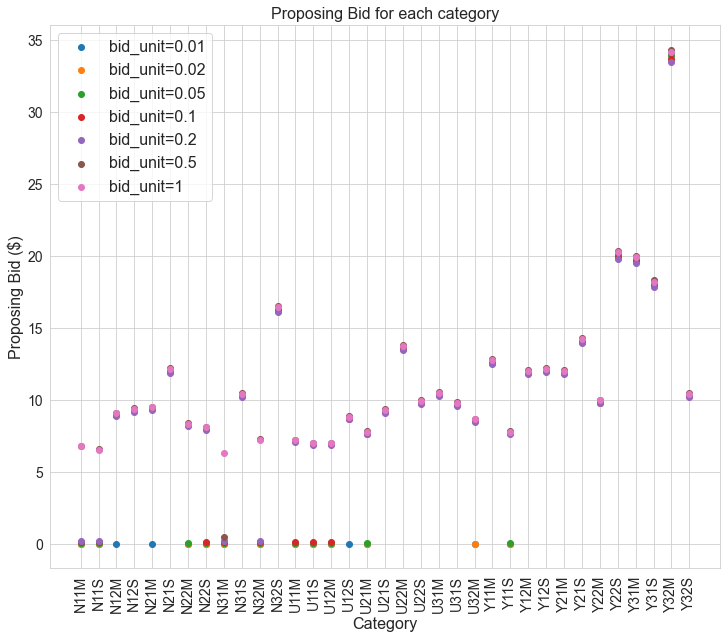

In [107]:
# plot "Proposing Bid"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = applied_bid_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Proposing Bid ($)", fontsize=16)
    ax.set_title("Proposing Bid for each category (1000 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

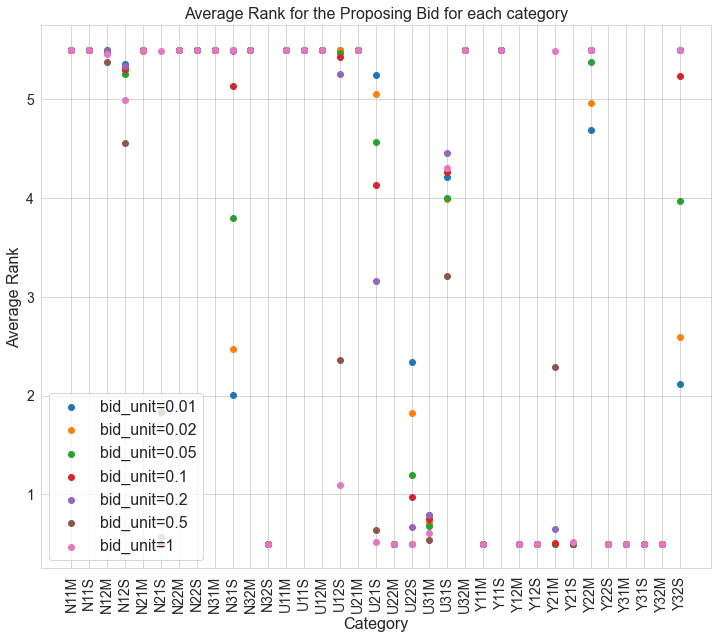

In [108]:
# plot "rank"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = rank_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Average Rank", fontsize=16)
    ax.set_title("Average Rank for the Proposing Bid for each category (1000 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="lower left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

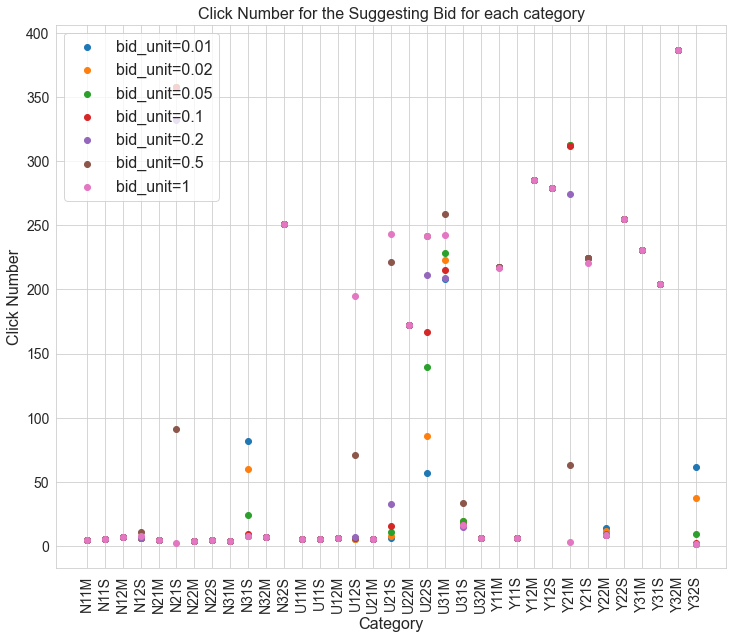

In [109]:
# plot "Click Number"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = click_num_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Click Number", fontsize=16)
    ax.set_title("Click Number for the Suggesting Bid for each category (1000 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

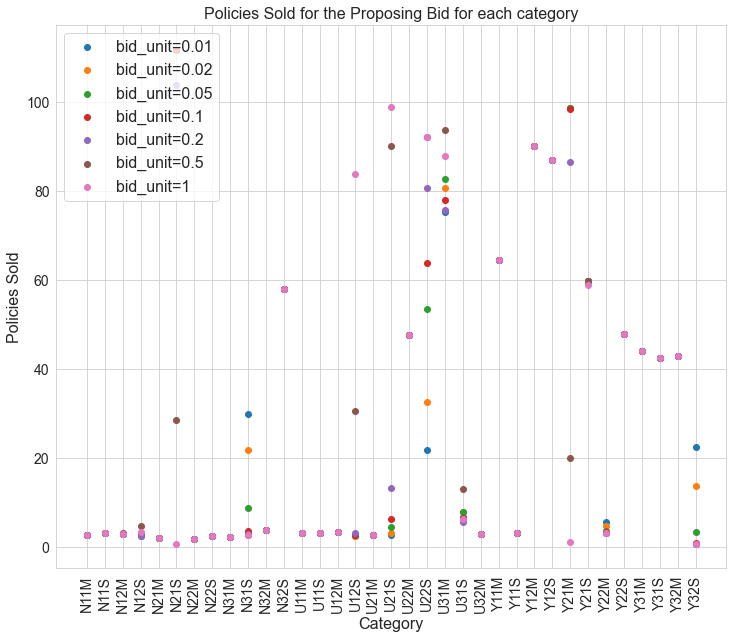

In [110]:
# plot "Policies Sold Number"

X_category_name = df.category_name.tolist() 
y = np.zeros((df_row_len,1)).tolist()

figure = plt.figure(figsize=(12,10))

for i in range(len(bid_unit)):

    y = policies_sold_num_opts[i,:] 
    #print(y)

    ax = plt.gca()
    ax.scatter(X_category_name, y)
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Policies Sold", fontsize=16)
    ax.set_title("Policies Sold for the Proposing Bid for each category (1000 policies sold)", fontsize=16)
    #ax.set_xlim([bid_min,bid_max])
    #ax.set_ylim([0,1])
    
plt.legend(['bid_unit=0.01', 'bid_unit=0.02', 'bid_unit=0.05','bid_unit=0.1','bid_unit=0.2','bid_unit=0.5','bid_unit=1'], loc ="upper left", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()